LOGISTIC REGRESSION MODEL CASE STUDY

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
# Importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as stm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# reading a data set 
lead_score=pd.read_csv("Leads.csv" , engine  = 'python')
lead_score.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead_score.shape

(9240, 37)

In [6]:
lead_score.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Data cleaning and preparation

In [7]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
round(lead_score.isnull().sum()/len(lead_score.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# lets drop columns having higher % of nulls
lead_score.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'],axis=1,inplace=True)

In [10]:
lead_score.shape

(9240, 32)

In [11]:
# Dropping other unnecessary columns
lead_score.drop(['Prospect ID','Get updates on DM Content','Update me on Supply Chain Content', 'Search', 'Magazine', 'Do Not Call','I agree to pay the amount through cheque', 'Receive More Updates About Our Courses','Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Through Recommendations','What matters most to you in choosing a course', 'Country'],axis=1,inplace=True)  


In [13]:
lead_score.shape

(9240, 17)

In [14]:
lead_score.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
Lead Profile                              2709
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [15]:
lead_score.City

0                   Select
1                   Select
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

In [16]:
# lets replace the value select with Nan in entire data set
lead_score = lead_score.replace('Select', np.nan)

In [17]:
lead_score.City

0                      NaN
1                      NaN
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

In [19]:
# But for city we can replace Nan with City Unknown
lead_score['City'] = lead_score['City'].replace(np.nan,'Unknown')

In [20]:
lead_score.City

0                  Unknown
1                  Unknown
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

In [21]:
round(lead_score.City.value_counts(normalize=True)*100,2)

Unknown                        39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

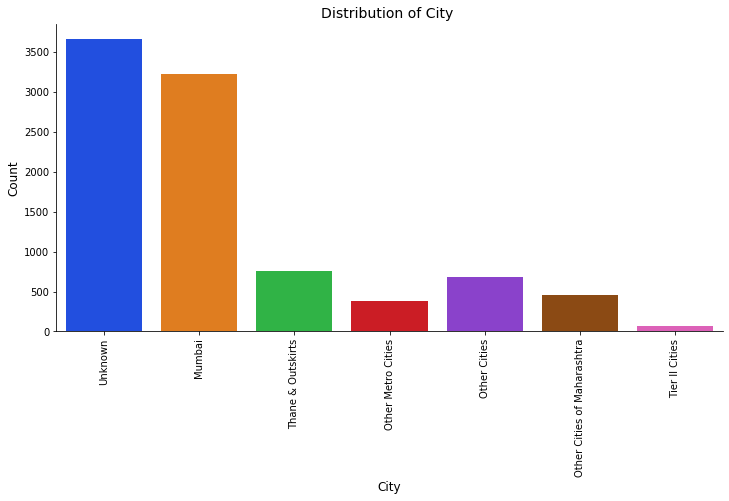

In [22]:
plot=sns.catplot(x='City',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Distribution of City ',fontsize=14)
plt.xlabel("City",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)


 1. Many leads belong to city unknown and Mumbai
 2. Very less leads belong to Tier II cities
    

In [23]:
# For lead activity column
round(lead_score['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [24]:
lead_score['Last Activity'].isnull().sum()

103

In [25]:
# Lets fill above nulls as Email opened since its majority
lead_score['Last Activity'].fillna("Email Opened", inplace=True)

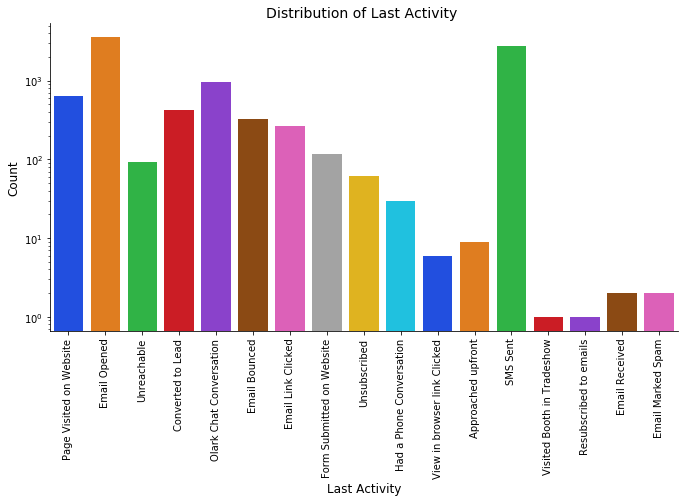

In [26]:
plot=sns.catplot(x='Last Activity',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Distribution of Last Activity ',fontsize=14)
plt.xlabel("Last Activity",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

1. Email opened and SMS sent has highest share 
2. Very less people resubscribed to emails or visited booth in tradeshow
3. Certain share of People also marked emails as spam

In [27]:
# For lead score
round(lead_score['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Live Chat             0.02
Social Media          0.02
Press_Release         0.02
WeLearn               0.01
blog                  0.01
welearnblog_Home      0.01
testone               0.01
Pay per Click Ads     0.01
youtubechannel        0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [28]:
# We have two google , so lets merge
lead_score['Lead Source']=lead_score["Lead Source"].replace('google','Google')

In [29]:
round(lead_score['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.21
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
blog                  0.01
WeLearn               0.01
NC_EDM                0.01
welearnblog_Home      0.01
testone               0.01
Pay per Click Ads     0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

In [30]:
# All the columns having very less share of lead score can be merged and treated as others together
lead_score['Lead Source']=lead_score['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','testone','welearnblog_Home','WeLearn','NC_EDM','blog','Pay per Click Ads','youtubechannel'],'Other Sources')

In [31]:
lead_score['Lead Source'].isnull().sum()

36

In [32]:
# Lets replace these nulls with highest share - Google
lead_score['Lead Source'].fillna("Google", inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

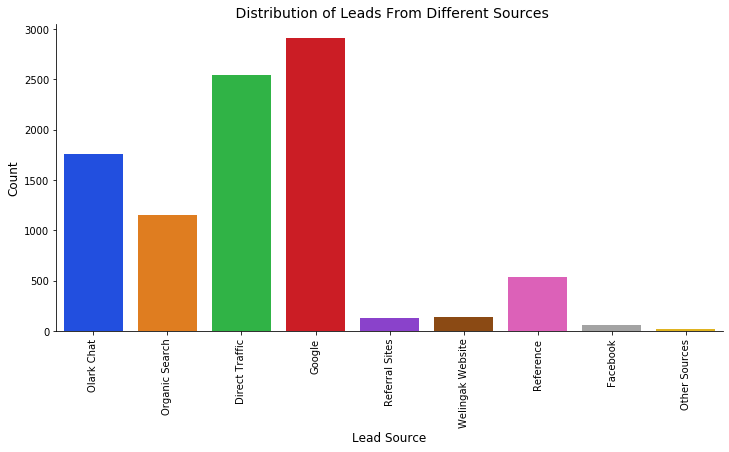

In [33]:
plot=sns.catplot(x='Lead Source',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title(' Distribution of Leads From Different Sources',fontsize=14)
plt.xlabel("Lead Source",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)

 1. Google and Direct traffic are the main source of leads
 2. Facebook, others and referral sites has contributed very less for lead source

In [34]:
# For total visits - number of visits made by customers on the site
lead_score['TotalVisits'].isnull().sum()

137

In [35]:
lead_score['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [36]:
# replacing the null values with median of the column
lead_score['TotalVisits'].fillna(lead_score['TotalVisits'].median(),inplace=True)

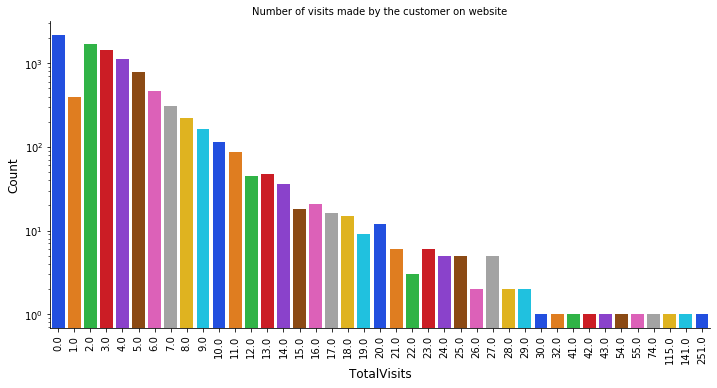

In [37]:
plot=sns.catplot(x='TotalVisits',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Number of visits made by the customer on website',fontsize=10)
plt.xlabel("TotalVisits",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

In [38]:
# For Page Views Per Visit
lead_score['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [39]:
lead_score['Page Views Per Visit'].isnull().sum()

137

In [40]:
# replacing the above null values with median of the column
lead_score['Page Views Per Visit'].fillna(lead_score['Page Views Per Visit'].median(), inplace=True)

In [44]:
# for tags
round(lead_score['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

In [45]:
lead_score['Tags'].isnull().sum()

3353

In [46]:
#  Nulls can be replaced with Not sure
lead_score['Tags'].fillna("Not sure", inplace=True)

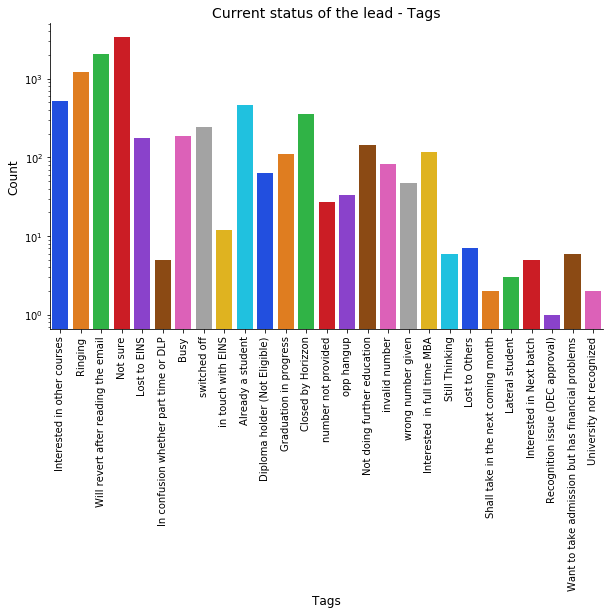

In [47]:
plot=sns.catplot(x='Tags',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Current status of the lead - Tags',fontsize=14)
plt.xlabel("Tags",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

Many customers are in unknown status
Majority customers needs to be ringed or will revert back after reading mail

In [48]:
# For specialization
round(lead_score['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [49]:
lead_score['Specialization'].isnull().sum()

3380

In [50]:
# change Null Values with Other specializations
lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

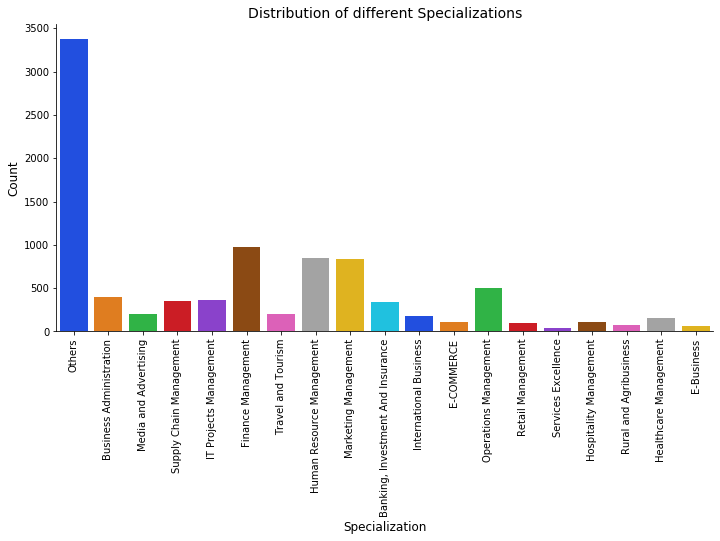

In [51]:
plot=sns.catplot(x='Specialization',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Distribution of different Specializations',fontsize=14)
plt.xlabel("Specialization",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)

Apart from others , major specialization is Finance,Human resource and Marketing management

In [52]:
# for what is your current occupation
round(lead_score['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [53]:
lead_score['What is your current occupation'].isnull().sum()

2690

In [54]:
# replacing nullvalues as Not known
lead_score['What is your current occupation'].fillna("Not known", inplace=True)

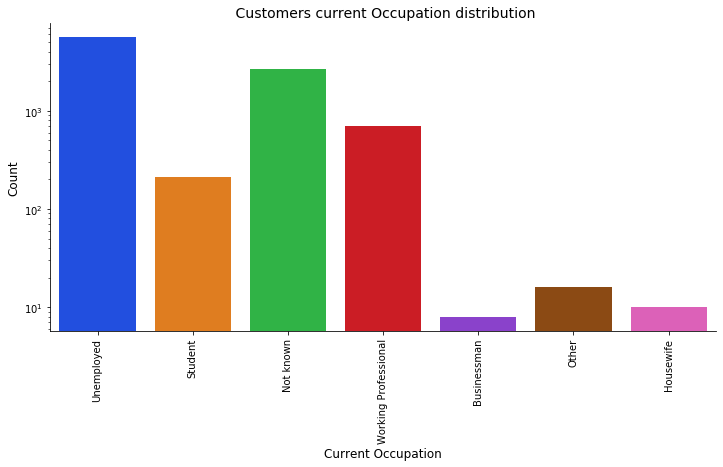

In [55]:
plot=sns.catplot(x='What is your current occupation',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title(' Customers current Occupation distribution',fontsize=14)
plt.xlabel("Current Occupation",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

1. Many of customers are unemployed
2. Working professional and students have higher share

In [56]:
# for How did you hear about X Education
lead_score['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [57]:
lead_score['How did you hear about X Education'].isnull().sum()

7250

In [58]:
# replacing nulls
lead_score['How did you hear about X Education'].fillna("Not Known", inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

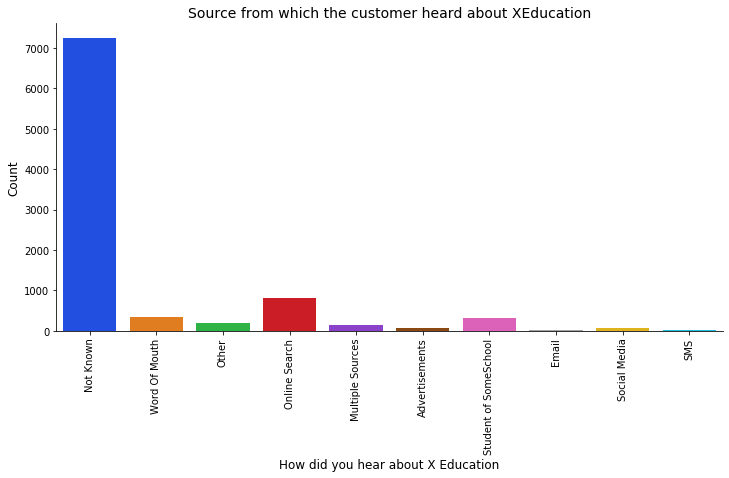

In [59]:
plot=sns.catplot(x='How did you hear about X Education',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('Source from which the customer heard about XEducation',fontsize=14)
plt.xlabel("How did you hear about X Education",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)

If unknown is ignored , many customers have found out about Xeducation on online search, word of mouth

In [60]:
# for Lead Profile
lead_score['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [61]:
lead_score['Lead Profile'].isnull().sum()

6855

In [62]:
# replacing nulls
lead_score['Lead Profile'].fillna("Not Known", inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

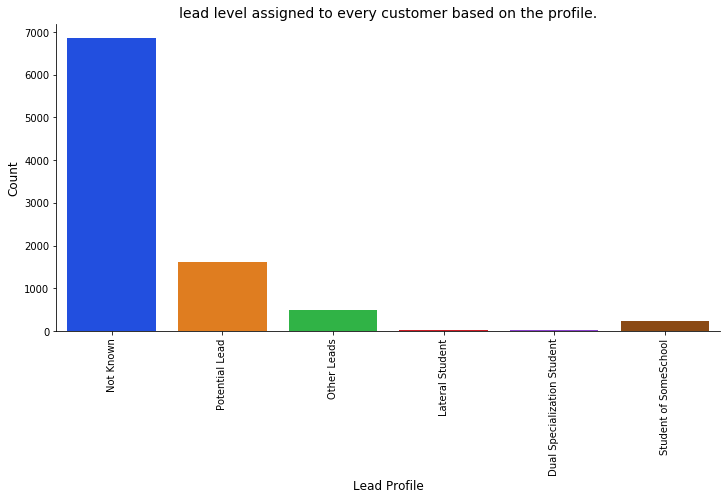

In [63]:
plot=sns.catplot(x='Lead Profile',kind='count',data=lead_score,palette="bright",aspect=2)
plt.title('lead level assigned to every customer based on the profile.',fontsize=14)
plt.xlabel("Lead Profile",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)


In [64]:
# lets check if any null exists
lead_score.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Tags                                      0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [65]:
lead_score.shape

(9240, 17)

Continous variables outliers check

In [67]:
lead = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [68]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

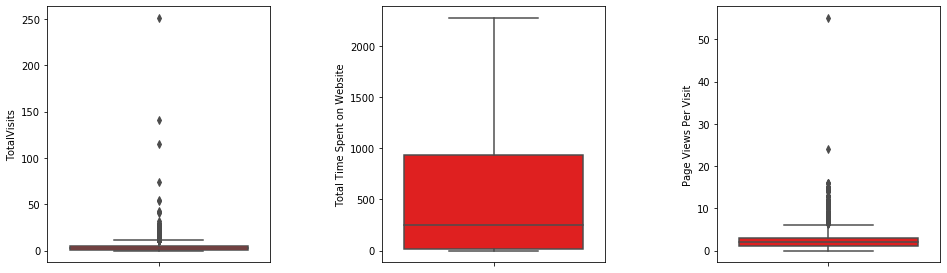

In [69]:
plt.figure(figsize=(16,16))

for i in enumerate(lead):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead_score[i[1]], orient="v",palette=['red'])
    plt.subplots_adjust(wspace=0.5,hspace=0.2)
        
plt.show()

Outlier treatment for Total visits and Page views per visit

In [70]:
Quar1=lead_score.TotalVisits.quantile(0.10)
Quar3=lead_score.TotalVisits.quantile(0.90)
IQR=Quar3-Quar1
lead_score=lead_score[(lead_score.TotalVisits>=Quar1-1.5*IQR) & (lead_score.TotalVisits<=Quar3+1.5*IQR)]

In [71]:
Quar1=lead_score['Page Views Per Visit'].quantile(0.10)
Quar3=lead_score['Page Views Per Visit'].quantile(0.90)
IQR=Quar3-Quar1
lead_score=lead_score[(lead_score['Page Views Per Visit']>=Quar1-1.5*IQR) & (lead_score['Page Views Per Visit']<=Quar3+1.5*IQR)]

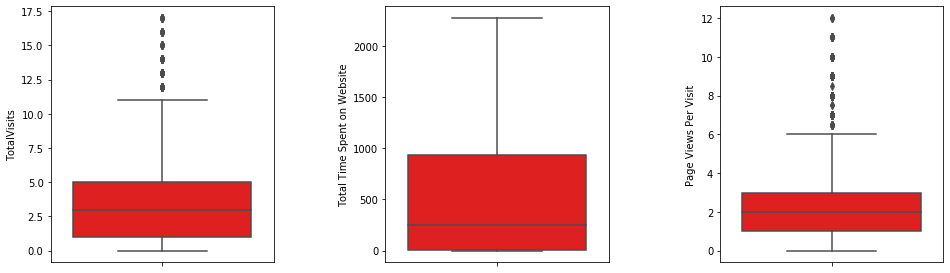

In [72]:
plt.figure(figsize=(16,16))

for i in enumerate(lead):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead_score[i[1]], orient="v",palette=['red'])
    plt.subplots_adjust(wspace=0.5,hspace=0.2)
        
plt.show()

Most of the outliers has been removed , lets ignore others to maintain data points

In [73]:
# Modelling

In [74]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 9239
Data columns (total 17 columns):
Lead Number                               9136 non-null int64
Lead Origin                               9136 non-null object
Lead Source                               9136 non-null object
Do Not Email                              9136 non-null object
Converted                                 9136 non-null int64
TotalVisits                               9136 non-null float64
Total Time Spent on Website               9136 non-null int64
Page Views Per Visit                      9136 non-null float64
Last Activity                             9136 non-null object
Specialization                            9136 non-null object
How did you hear about X Education        9136 non-null object
What is your current occupation           9136 non-null object
Tags                                      9136 non-null object
Lead Profile                              9136 non-null object
City        

In [75]:
lead_score['Do Not Email'].value_counts()

No     8422
Yes     714
Name: Do Not Email, dtype: int64

In [76]:
lead_score['A free copy of Mastering The Interview'].value_counts()

No     6312
Yes    2824
Name: A free copy of Mastering The Interview, dtype: int64

In [77]:
# Lets convert above yes or no to binary values

collist=['Do Not Email','A free copy of Mastering The Interview'] 

def map_col(items):
    return items.map({'Yes': 1, "No": 0})


lead_score[collist] = lead_score[collist].apply(map_col)
lead_score.head() 

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  How did you hear about X Education What is your current occupation  \
0                          Not Known                      Unemployed   
1                          Not Known                      Unemployed   
2                          Not Known                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses       Not Known  Unknown   
1                              Ringing       Not Known  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing       Not Known   Mumbai   
4  Will revert after reading the email       Not Known   Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [78]:
# creating Dummy Variables
lead_origin=pd.get_dummies(lead_score['Lead Origin'], prefix='Lead Origin',drop_first=True)
lead_source=pd.get_dummies(lead_score['Lead Source'], prefix= 'Lead Source',drop_first=True)
lead_last_activity=pd.get_dummies(lead_score['Last Activity'], prefix='Last Activity',drop_first=True)
lead_current_occupation=pd.get_dummies(lead_score['What is your current occupation'], prefix='current occupation',drop_first=True)
lead_city=pd.get_dummies(lead_score['City'], prefix='City',drop_first=True)
lead_tags=pd.get_dummies(lead_score['Tags'],prefix= 'Tags',drop_first=True)
lead_specialization=pd.get_dummies(lead_score['Specialization'],prefix='Specialization',drop_first=True)
lead_lastnotableactivity=pd.get_dummies(lead_score['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
lead_leadprofile=pd.get_dummies(lead_score['Lead Profile'],prefix='Lead Profile',drop_first=True)
lead_XEducation=pd.get_dummies(lead_score['How did you hear about X Education'],prefix='How did you hear about X Education',drop_first=True)

In [79]:
# Concatenation of dummy variables with data set
lead_score=pd.concat([lead_score,lead_origin],axis=1)
lead_score=pd.concat([lead_score,lead_source],axis=1)
lead_score=pd.concat([lead_score,lead_last_activity],axis=1)
lead_score=pd.concat([lead_score,lead_current_occupation],axis=1)
lead_score=pd.concat([lead_score,lead_city],axis=1)
lead_score=pd.concat([lead_score,lead_tags],axis=1)
lead_score=pd.concat([lead_score,lead_specialization],axis=1)
lead_score=pd.concat([lead_score,lead_lastnotableactivity],axis=1)
lead_score=pd.concat([lead_score,lead_leadprofile],axis=1)
lead_score=pd.concat([lead_score,lead_XEducation],axis=1)

In [80]:
# redundant columns can be dropped
lead_score.drop(['Lead Origin'],axis=1,inplace=True)
lead_score.drop(['Lead Source'],axis=1,inplace=True)
lead_score.drop(['Last Activity'],axis=1,inplace=True)
lead_score.drop(['What is your current occupation'],axis=1,inplace=True)
lead_score.drop(['City'],axis=1,inplace=True)
lead_score.drop(['Tags'],axis=1,inplace=True)
lead_score.drop(['Specialization'],axis=1,inplace=True)
lead_score.drop(['Last Notable Activity'],axis=1,inplace=True)
lead_score.drop(['Lead Profile'],axis=1,inplace=True)
lead_score.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [81]:
lead_score.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  Lead Profile_Student of SomeSchool  \
0                        0  ...                                   0   
1                        0  ...                                   0   
2                        0  ...                                   0   
3                        0  ...                                   0   
4                        0  ...                                   0   

   How did you hear about X Education_Email  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   How did you hear about X Education_Multiple Sources  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   How did you hear about X Education_Not Known  \
0                                             1   
1                                             1   
2                                             1   
3                                             0   
4                                             0   

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   How did you hear about X Education_Other  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   How did you hear about X Education_SMS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   How did you hear about X Education_Social Media  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   How did you hear about X Education_Student of SomeSchool  \
0   

In [82]:
# columns in data set
for all_column in lead_score.columns: 
    print(all_column) 

Lead Number
Do Not Email
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
A free copy of Mastering The Interview
Lead Origin_Landing Page Submission
Lead Origin_Lead Add Form
Lead Origin_Lead Import
Lead Origin_Quick Add Form
Lead Source_Facebook
Lead Source_Google
Lead Source_Olark Chat
Lead Source_Organic Search
Lead Source_Other Sources
Lead Source_Reference
Lead Source_Referral Sites
Lead Source_Welingak Website
Last Activity_Converted to Lead
Last Activity_Email Bounced
Last Activity_Email Link Clicked
Last Activity_Email Marked Spam
Last Activity_Email Opened
Last Activity_Email Received
Last Activity_Form Submitted on Website
Last Activity_Had a Phone Conversation
Last Activity_Olark Chat Conversation
Last Activity_Page Visited on Website
Last Activity_Resubscribed to emails
Last Activity_SMS Sent
Last Activity_Unreachable
Last Activity_Unsubscribed
Last Activity_View in browser link Clicked
Last Activity_Visited Booth in Tradeshow
current occupation_Housew

In [83]:
# lets remove duplicated columns
lead_score = lead_score.loc[:,~lead_score.columns.duplicated()]

In [84]:
lead_score.isnull().sum()

Lead Number                                                 0
Do Not Email                                                0
Converted                                                   0
TotalVisits                                                 0
Total Time Spent on Website                                 0
                                                           ..
How did you hear about X Education_Other                    0
How did you hear about X Education_SMS                      0
How did you hear about X Education_Social Media             0
How did you hear about X Education_Student of SomeSchool    0
How did you hear about X Education_Word Of Mouth            0
Length: 120, dtype: int64

In [85]:
lead_score.shape

(9136, 120)

## Test and Train set split
X - feature variables
Y - Response variables

In [86]:
X = lead_score.drop(['Converted','Lead Number'],axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   ...  Lead Profile_Student of SomeSchool  \
0  ...                                   0   
1  ...                                   0   
2  ...                                   0   
3  ...                                   0   
4  ...                                   0   

   How did you hear about X Education_Email  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   How did you hear about X Education_Multiple Sources  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   How did you hear about X Education_Not Known  \
0                                             1   
1                                             1   
2                                             1   
3                                             0   
4                                             0   

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   How did you hear about X Education_Other  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   How did you hear about X Education_SMS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   How did you hear about X Education_Social Media  \
0                                                0   
1                                                0   
2                                                0   
3                   

In [87]:
Y=lead_score['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
# Rescaling Process 

scaler=StandardScaler()

# Numeric variables list
numeric_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[numeric_var]=scaler.fit_transform(X_train[numeric_var])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7896             0    -0.401654                     1.306686   
8701             0    -0.747311                     0.200127   
6665             0     0.289660                     1.561341   
8087             0    -1.092968                    -0.888112   
2466             0     0.289660                    -0.545519   

      Page Views Per Visit  A free copy of Mastering The Interview  \
7896             -0.150729                                       1   
8701             -0.662236                                       1   
6665              0.872286                                       0   
8087             -1.173744                                       0   
2466             -0.150729                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7896                                    1                          0   
8701                                    1                          0   
6665                                    1                          0   
8087                                    0                          1   
2466                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7896                        0                           0   
8701                        0                           0   
6665                        0                           0   
8087                        0                           0   
2466                        0                           0   

      Lead Source_Facebook  ...  Lead Profile_Student of SomeSchool  \
7896                     0  ...                                   0   
8701                     0  ...                                   0   
6665                     0  ...                                   0   
8087                     0  ...                                   0   
2466                     0  ...                                   0   

      How did you hear about X Education_Email  \
7896                                         0   
8701                                         0   
6665                                         0   
8087                                         0   
2466                                         0   

      How did you hear about X Education_Multiple Sources  \
7896                                                  0     
8701                                                  0     
6665                                                  0     
8087                                                  0     
2466                                                  0     

      How did you hear about X Education_Not Known  \
7896                                             1   
8701                                             1   
6665                                             0   
8087                                             1   
2466                                             1   

      How did you hear about X Education_Online Search  \
7896                                                 0   
8701                                                 0   
6665                                                 0   
8087                                                 0   
2466                                                 0   

      How did you hear about X Education_Other  \
7896                                         0   
8701                                         0   
6665                                         1   
8087                                         0   
2466                                         0   

      How did you hear about X Education_SMS  \
7896                                       0   
8701                                       0   
6665                                       0   
8087                                       0   
2466                                       0   

      How did you hear about X Education_

In [90]:

converted=round((sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100,2)
converted  

38.5

38.5% is the lead conversion rate

# Correlations

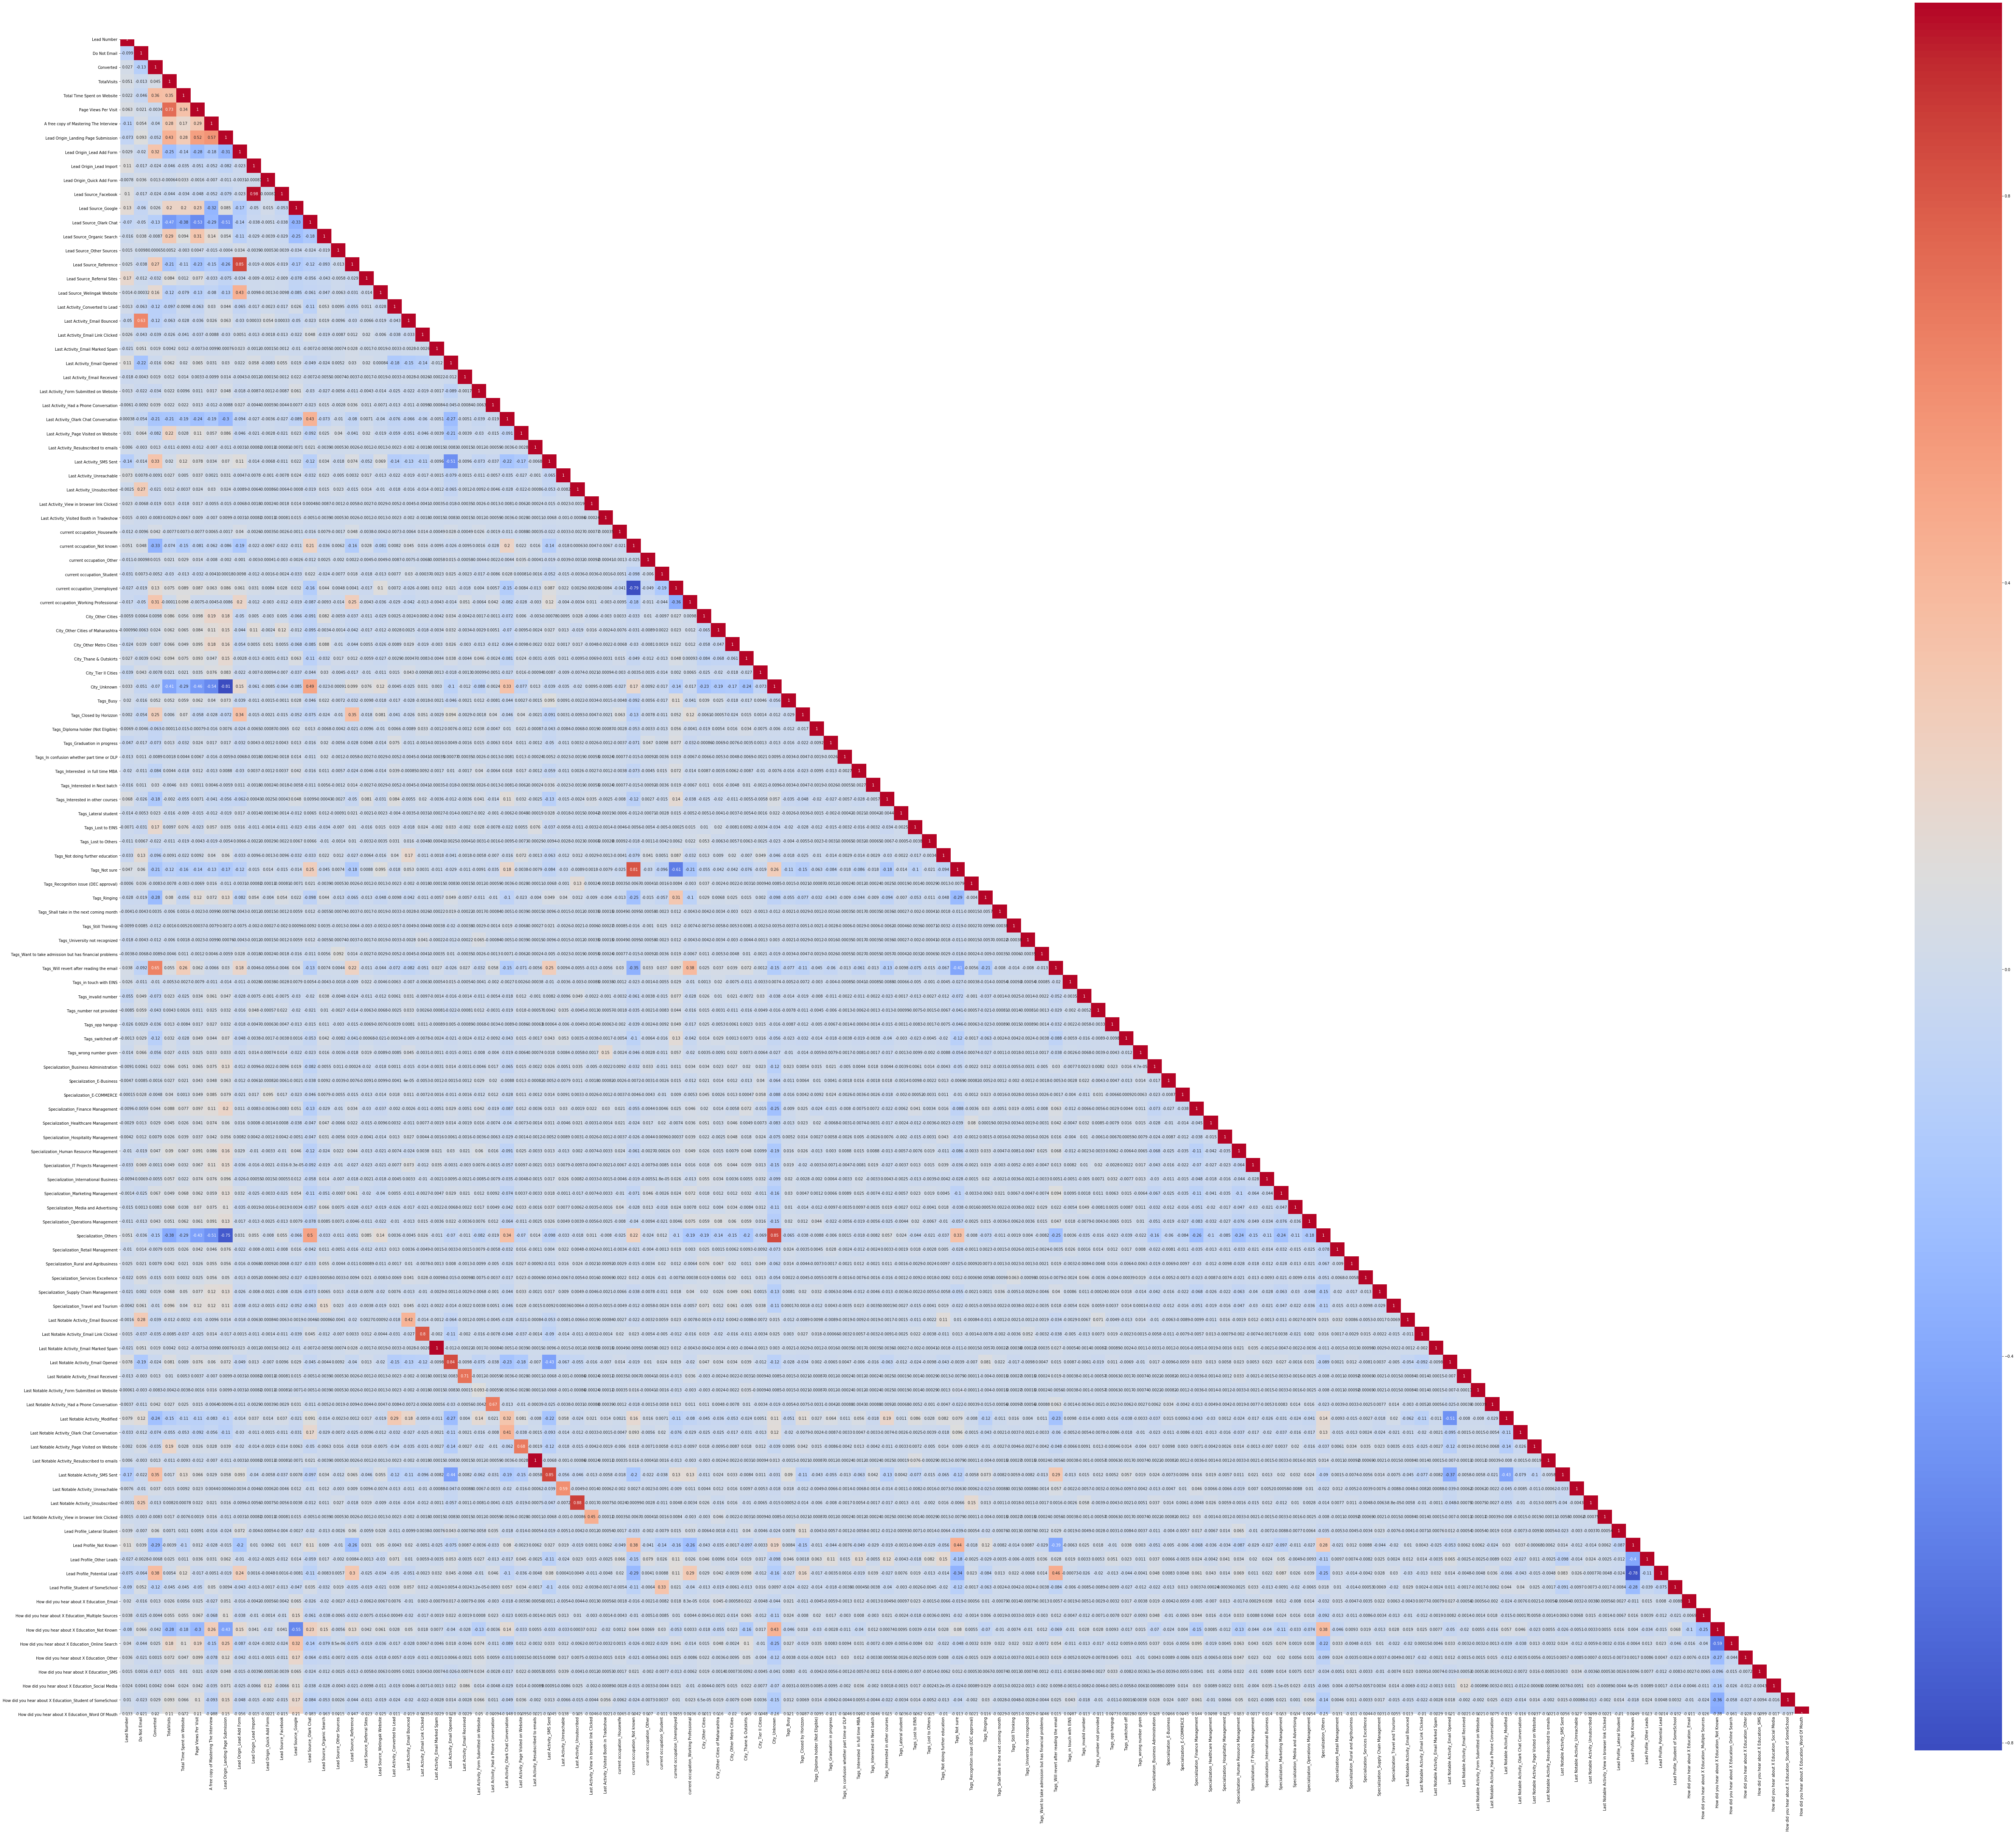

In [91]:
# heat maps
ht_map= lead_score.corr()
map_msk = np.array(ht_map)
map_msk[np.tril_indices_from(map_msk)] = False
fig=plt.gcf()
fig.set_size_inches(100,85)
sns.heatmap(ht_map, mask=map_msk, square=True, annot=True, cbar=True,cmap="coolwarm")
plt.show()

In [92]:
# highly correlated values can be dropped and check map again
X_test=X_test.drop(['City_Unknown','Last Notable Activity_Email Link Clicked','Tags_Not sure','Lead Source_Facebook','Lead Source_Reference','current occupation_Unemployed','Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Resubscribed to emails'],1)
X_train=X_train.drop(['City_Unknown','Last Notable Activity_Email Link Clicked','Tags_Not sure','Lead Source_Facebook','Lead Source_Reference','current occupation_Unemployed','Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Resubscribed to emails'],1)

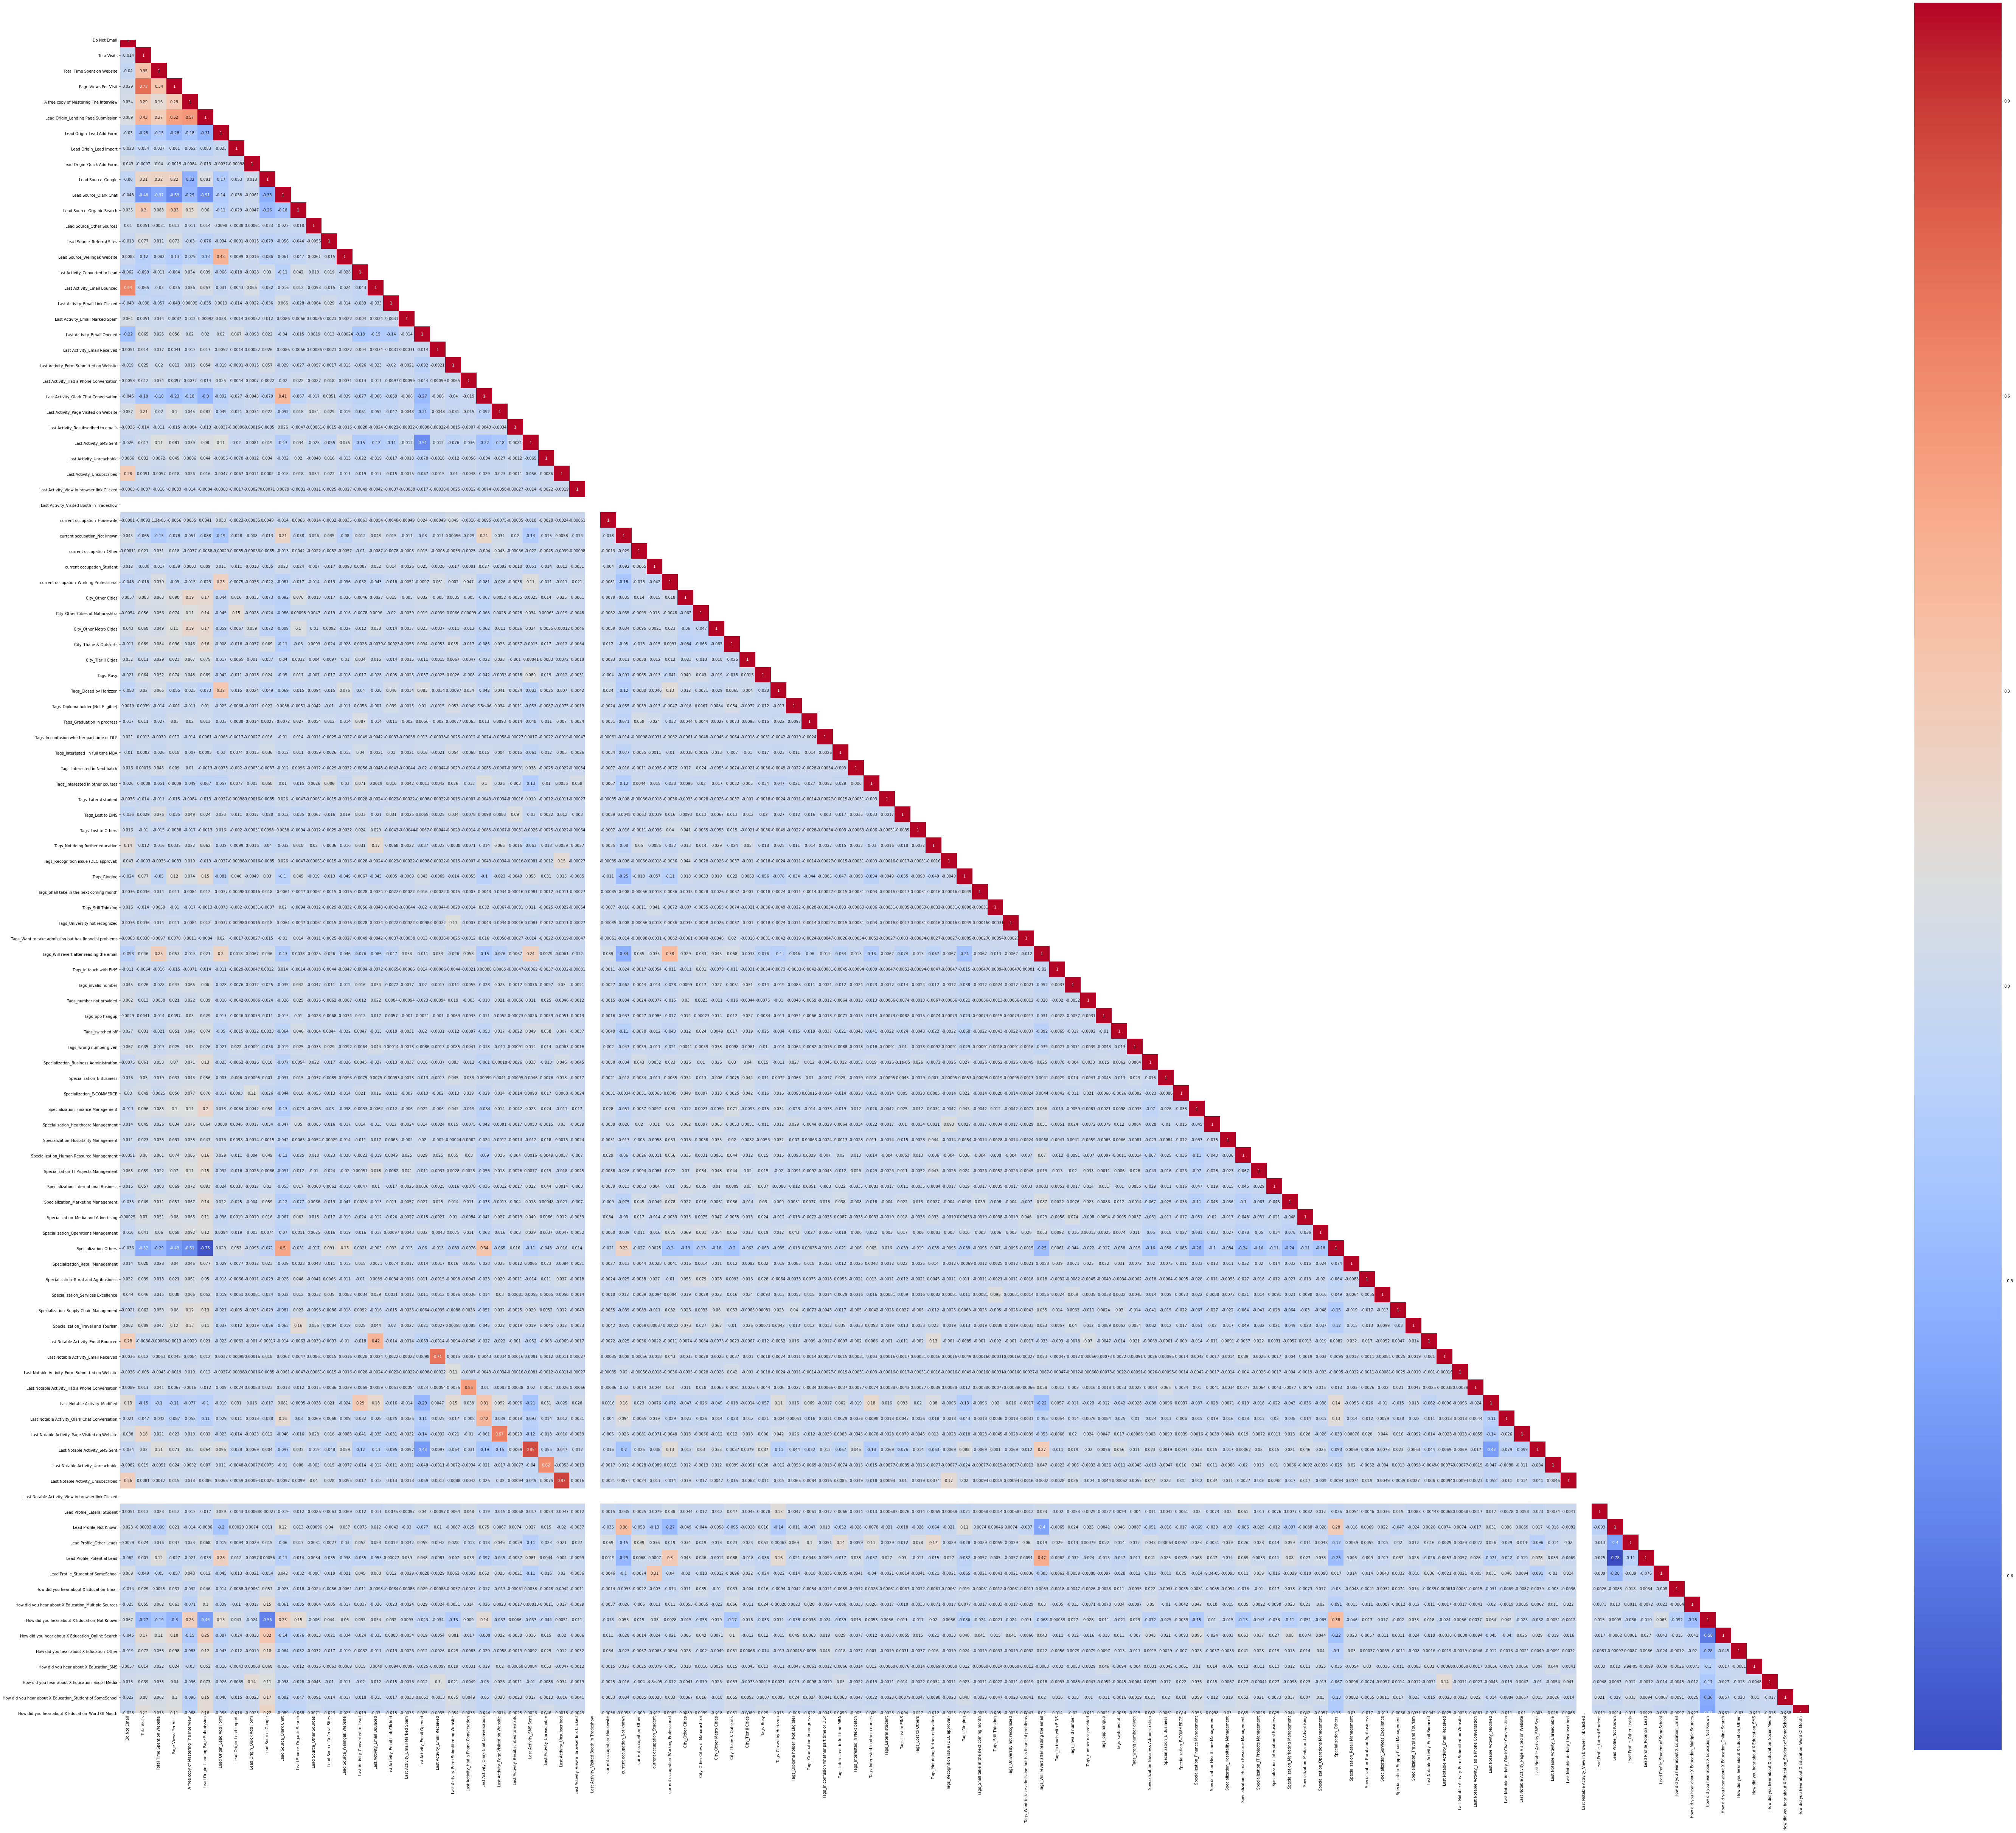

In [93]:
ht_map= X_train.corr()
map_msk = np.array(ht_map)
map_msk[np.tril_indices_from(map_msk)] = False
fig=plt.gcf()
fig.set_size_inches(100,85)
sns.heatmap(ht_map, mask=map_msk, square=True, annot=True, cbar=True,cmap="coolwarm")
plt.show()

Though there as some correlation left we can ignore it because it might prove to be usefull for further model

Logistic regression model

In [94]:
log_reg1 = stm.GLM(Y_train,(stm.add_constant(X_train)), family = stm.families.Binomial())
log_reg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                          107
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Jan 2023   Deviance:                          nan
Time:                        21:46:09   Pearson chi2:                 2.25e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     6.345e+15   3.12e+07   2.03e+08      0.000    6.35e+15    6.35e+15
Do Not Email                                              -1.61e+14    4.6e+06   -3.5e+07      0.000   -1.61e+14   -1.61e+14
TotalVisits                                               1.346e+14   1.36e+06   9.89e+07      0.000    1.35e+14    1.35e+14
Total Time Spent on Website                                3.25e+14   1.02e+06   3.19e+08      0.000    3.25e+14    3.25e+14
Page Views Per Visit                                      -7.77e+13   1.44e+06  -5.41e+07      0.000   -7.77e+13   -7.77e+13
A free copy of Mastering The Interview                   -3.334e+13   3.34e+06  -9.98e+06      0.000   -3.33e+13   -3.33e+13
Lead Origin_Landing Page Submission                      -2.563e+14   3.98e+06  -6.45e+07      0.000   -2.56e+14   -2.56e+14
Lead Origin_Lead Add Form                                 5.575e+13   5.28e+06   1.06e+07      0.000    5.58e+13    5.58e+13
Lead Origin_Lead Import                                  -2.319e+14   1.15e+07  -2.01e+07      0.000   -2.32e+14   -2.32e+14
Lead Origin_Quick Add Form                                3.662e+15   6.88e+07   5.33e+07      0.000    3.66e+15    3.66e+15
Lead Source_Google                                        1.121e+14   3.09e+06   3.63e+07      0.000    1.12e+14    1.12e+14
Lead Source_Olark Chat                                    2.881e+14   4.12e+06   6.99e+07      0.000    2.88e+14    2.88e+14
Lead Source_Organic Search                                1.517e+13   3.27e+06   4.63e+06      0.000    1.52e+13    1.52e+13
Lead Source_Other Sources                                 4.632e+14   1.76e+07   2.63e+07      0.000    4.63e+14    4.63e+14
Lead Source_Referral Sites                                9.814e+13    7.9e+06   1.24e+07      0.000    9.81e+13    9.81e+13
Lead Source_Welingak Website                               1.63e+15   8.06e+06   2.02e+08      0.000    1.63e+15    1.63e+15
Last Activity_Converted to Lead                          -3.773e+15   2.32e+07  -1.63e+08      0.000   -3.77e+15   -3.77e+15
Last Activity_Email Bounced                              -3.922e+15   2.37e+07  -1.65e+08      0.000   -3.92e+15   -3.92e+15
Last Activity_Email Link Clicked                         -3.669e+15   2.33e+07  -1.58e+08      0.000   -3.67e+15   -3.67e+15
Last Activity_Email Marked Spam                           1.583e+14    5.3e+07   2.99e+06      0.000    1.58e+14    1.58e+14
Last Activity_Email Opened                               -3.666e+15   2.28e+07  -1.61e+08      0.000   -3.67e+15   -3.67e+15
Last Activity_Email Received                             -4.668e+14   7.19e+07  -6.

In [95]:
# RFE feature selection
lgregsn = LogisticRegression()

In [96]:
rfe = RFE(lgregsn, 20)             
rfe = rfe.fit(X_train, Y_train)

In [97]:
# to check whether the features selected are in the top 20 or not present
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 55),
 ('A free copy of Mastering The Interview', False, 75),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 60),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Google', False, 70),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_Other Sources', False, 28),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 53),
 ('Last Activity_Email Bounced', False, 39),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Marked Spam', False, 73),
 ('Last Activity_Email Opened', False, 31),
 ('Last Activity_Email Received', False, 78),
 ('Last Activity_Form Submitted on Website', False, 66),
 ('Last Activity_Had a Phone Conver

In [99]:
col = X_train.columns[rfe.support_]

In [100]:
# Columns that got excluded :
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Act

In [101]:
# Statistical model - 1 analysis

In [102]:
X_train_1 = stm.add_constant(X_train[col])
log_reg_mod1 = stm.GLM(Y_train,X_train_1, family = stm.families.Binomial())
reg_mod1 = log_reg_mod1.fit()
reg_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1297.0
Date:                Sun, 15 Jan 2023   Deviance:                       2594.1
Time:                        21:50:12   Pearson chi2:                 1.38e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4225      0.096     -4.422      0.000      -0.610      -0.235
Lead Origin_Lead Add Form                   -0.1678      0.327     -0.513      0.608      -0.809       0.473
Lead Source_Welingak Website                 3.8702      0.814      4.755      0.000       2.275       5.465
Last Activity_SMS Sent                       2.2376      0.117     19.067      0.000       2.008       2.468
current occupation_Not known                -1.7562      0.121    -14.527      0.000      -1.993      -1.519
Tags_Closed by Horizzon                      6.5084      0.745      8.736      0.000       5.048       7.969
Tags_Diploma holder (Not Eligible)          -3.1520      1.037     -3.041      0.002      -5.184      -1.120
Tags_Graduation in progress                 -1.4789      0.441     -3.351      0.001      -2.344      -0.614
Tags_Interested  in full time MBA           -2.4100      0.600     -4.013      0.000      -3.587      -1.233
Tags_Interested in other courses            -2.9889      0.431     -6.939      0.000      -3.833      -2.145
Tags_Lost to EINS                            6.2957      0.629     10.003      0.000       5.062       7.529
Tags_Not doing further education            -3.7566      1.025     -3.663      0.000      -5.766      -1.747
Tags_Ringing                                -4.3190      0.236    -18.321      0.000      -4.781      -3.857
Tags_Will revert after reading the email     3.9139      0.196     19.992      0.000       3.530       4.298
Tags_invalid number                         -4.8543      1.027     -4.726      0.000      -6.868      -2.841
Tags_number not provided                   -25.3647    2.8e+04     -0.001      0.999   -5.49e+04    5.49e+04
Tags_opp hangup                             -3.6905      1.065     -3.464      0.001      -5.778      -1.603
Tags_switched off                           -5.0872      0.599     -8.497      0.000      -6.261      -3.914
Tags_wrong number given                    -25.1190   2.01e+04     -0.001      0.999   -3.95e+04    3.94e+04
Last Notable Activity_Modified              -1.7156      0.126    -13.656      0.000      -1.962      -1.469
Lead Profile_Student of SomeSchool          -3.3396      0.585     -5.708      0.000      -4.486      -2.193
============================================================================================================
"""

In [103]:
 X_train_2=X_train_1.drop(['const','Tags_number not provided'],1)

In [106]:
X_train_2 = stm.add_constant(X_train_2)
log_reg_mod2 = stm.GLM(Y_train,X_train_2, family = stm.families.Binomial())
reg_mod2 = log_reg_mod2.fit()
reg_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1314.7
Date:                Sun, 15 Jan 2023   Deviance:                       2629.5
Time:                        21:51:48   Pearson chi2:                 1.31e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4852      0.095     -5.124      0.000      -0.671      -0.300
Lead Origin_Lead Add Form                   -0.1529      0.327     -0.467      0.640      -0.794       0.489
Lead Source_Welingak Website                 3.9112      0.813      4.811      0.000       2.318       5.505
Last Activity_SMS Sent                       2.1908      0.116     18.961      0.000       1.964       2.417
current occupation_Not known                -1.6800      0.119    -14.067      0.000      -1.914      -1.446
Tags_Closed by Horizzon                      6.5349      0.745      8.777      0.000       5.076       7.994
Tags_Diploma holder (Not Eligible)          -3.0848      1.035     -2.980      0.003      -5.113      -1.056
Tags_Graduation in progress                 -1.4144      0.440     -3.217      0.001      -2.276      -0.553
Tags_Interested  in full time MBA           -2.3500      0.600     -3.915      0.000      -3.526      -1.174
Tags_Interested in other courses            -2.9255      0.430     -6.804      0.000      -3.768      -2.083
Tags_Lost to EINS                            6.2826      0.629      9.995      0.000       5.051       7.515
Tags_Not doing further education            -3.6870      1.024     -3.600      0.000      -5.694      -1.680
Tags_Ringing                                -4.2182      0.234    -18.023      0.000      -4.677      -3.759
Tags_Will revert after reading the email     3.9609      0.195     20.320      0.000       3.579       4.343
Tags_invalid number                         -4.7518      1.027     -4.629      0.000      -6.764      -2.740
Tags_opp hangup                             -3.5916      1.064     -3.376      0.001      -5.677      -1.506
Tags_switched off                           -4.9833      0.598     -8.334      0.000      -6.155      -3.811
Tags_wrong number given                    -24.0222   1.22e+04     -0.002      0.998    -2.4e+04     2.4e+04
Last Notable Activity_Modified              -1.6851      0.125    -13.490      0.000      -1.930      -1.440
Lead Profile_Student of SomeSchool          -3.2911      0.586     -5.614      0.000      -4.440      -2.142
============================================================================================================
"""

In [107]:
 X_train_3=X_train_2.drop(['const','Tags_wrong number given'],1)

In [108]:
X_train_3 = stm.add_constant(X_train_3)
log_reg_mod3 = stm.GLM(Y_train,X_train_3, family = stm.families.Binomial())
reg_mod3 = log_reg_mod3.fit()
reg_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6376
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.3
Date:                Sun, 15 Jan 2023   Deviance:                       2682.5
Time:                        21:52:30   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5768      0.094     -6.163      0.000      -0.760      -0.393
Lead Origin_Lead Add Form                   -0.1272      0.328     -0.388      0.698      -0.770       0.515
Lead Source_Welingak Website                 3.9801      0.812      4.900      0.000       2.388       5.572
Last Activity_SMS Sent                       2.1234      0.113     18.795      0.000       1.902       2.345
current occupation_Not known                -1.5628      0.117    -13.328      0.000      -1.793      -1.333
Tags_Closed by Horizzon                      6.5942      0.744      8.865      0.000       5.136       8.052
Tags_Diploma holder (Not Eligible)          -2.9840      1.033     -2.888      0.004      -5.009      -0.959
Tags_Graduation in progress                 -1.3105      0.437     -2.995      0.003      -2.168      -0.453
Tags_Interested  in full time MBA           -2.2534      0.600     -3.757      0.000      -3.429      -1.078
Tags_Interested in other courses            -2.8238      0.429     -6.582      0.000      -3.665      -1.983
Tags_Lost to EINS                            6.2853      0.628     10.014      0.000       5.055       7.516
Tags_Not doing further education            -3.5782      1.023     -3.498      0.000      -5.583      -1.573
Tags_Ringing                                -4.0716      0.232    -17.576      0.000      -4.526      -3.618
Tags_Will revert after reading the email     4.0439      0.194     20.859      0.000       3.664       4.424
Tags_invalid number                         -4.6025      1.026     -4.487      0.000      -6.613      -2.592
Tags_opp hangup                             -3.4474      1.062     -3.246      0.001      -5.529      -1.366
Tags_switched off                           -4.8319      0.597     -8.096      0.000      -6.002      -3.662
Last Notable Activity_Modified              -1.6676      0.124    -13.454      0.000      -1.911      -1.425
Lead Profile_Student of SomeSchool          -3.2184      0.589     -5.463      0.000      -4.373      -2.064
============================================================================================================
"""

In [109]:
 X_train_4=X_train_3.drop(['const','Lead Origin_Lead Add Form'],1)

In [110]:
X_train_4 = stm.add_constant(X_train_4)
log_reg_mod4 = stm.GLM(Y_train,X_train_4, family = stm.families.Binomial())
reg_mod4 = log_reg_mod4.fit()
reg_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.3
Date:                Sun, 15 Jan 2023   Deviance:                       2682.7
Time:                        21:53:43   Pearson chi2:                 1.22e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5781      0.094     -6.179      0.000      -0.761      -0.395
Lead Source_Welingak Website                 3.8551      0.746      5.170      0.000       2.394       5.317
Last Activity_SMS Sent                       2.1227      0.113     18.789      0.000       1.901       2.344
current occupation_Not known                -1.5609      0.117    -13.324      0.000      -1.790      -1.331
Tags_Closed by Horizzon                      6.5293      0.724      9.024      0.000       5.111       7.947
Tags_Diploma holder (Not Eligible)          -2.9825      1.033     -2.887      0.004      -5.007      -0.958
Tags_Graduation in progress                 -1.3085      0.437     -2.991      0.003      -2.166      -0.451
Tags_Interested  in full time MBA           -2.2519      0.600     -3.755      0.000      -3.427      -1.076
Tags_Interested in other courses            -2.8235      0.429     -6.582      0.000      -3.664      -1.983
Tags_Lost to EINS                            6.2818      0.628     10.008      0.000       5.052       7.512
Tags_Not doing further education            -3.5781      1.023     -3.498      0.000      -5.583      -1.573
Tags_Ringing                                -4.0742      0.232    -17.592      0.000      -4.528      -3.620
Tags_Will revert after reading the email     4.0235      0.186     21.651      0.000       3.659       4.388
Tags_invalid number                         -4.6006      1.026     -4.485      0.000      -6.611      -2.590
Tags_opp hangup                             -3.4455      1.062     -3.244      0.001      -5.527      -1.364
Tags_switched off                           -4.8300      0.597     -8.093      0.000      -6.000      -3.660
Last Notable Activity_Modified              -1.6692      0.124    -13.472      0.000      -1.912      -1.426
Lead Profile_Student of SomeSchool          -3.2134      0.588     -5.461      0.000      -4.367      -2.060
============================================================================================================
"""

P-values for 4th model is < 0.05

# Variance Inflation Factor

In [111]:
X_train_4_1=X_train_4.drop('const',1)  

In [112]:
# Creating a DataFrame that will hold the names of all the feature variables with VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_4_1.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_4_1.values, i) for i in range(X_train_4_1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

Features   VIF
3                    Tags_Closed by Horizzon  1.08
8                          Tags_Lost to EINS  1.04
14                         Tags_switched off  1.04
6          Tags_Interested  in full time MBA  1.03
9           Tags_Not doing further education  1.03
0               Lead Source_Welingak Website  1.03
5                Tags_Graduation in progress  1.03
16        Lead Profile_Student of SomeSchool  1.03
4         Tags_Diploma holder (Not Eligible)  1.01
12                       Tags_invalid number  1.01
13                           Tags_opp hangup  1.00
7           Tags_Interested in other courses  0.30
11  Tags_Will revert after reading the email  0.12
10                              Tags_Ringing  0.11
1                     Last Activity_SMS Sent  0.09
15            Last Notable Activity_Modified  0.05
2               current occupation_Not known  0.04

So all VIFS are < 5

In [113]:
# fetching predicted values on the train set
Y_train_pred = reg_mod4.predict(X_train_4)
Y_train_pred[:10]

7896    0.001794
8701    0.922275
6665    0.969095
8087    0.969095
2466    0.001794
550     0.001794
461     0.105372
6746    0.021708
6888    0.009450
6975    0.022065
dtype: float64

In [114]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.00179401, 0.92227544, 0.96909452, 0.96909452, 0.00179401,
       0.00179401, 0.10537179, 0.02170757, 0.00944974, 0.02206479])

In [115]:
# Creating a DataFrame
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final['Lead Number'] = Y_train.index
Y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.001794         7896
1          1        0.922275         8701
2          1        0.969095         6665
3          1        0.969095         8087
4          0        0.001794         2466

In [116]:
# Imposing new col if Coverted probability is greater than 0.5 and map it as 1 else map it as 0
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.001794         7896          0
1          1        0.922275         8701          1
2          1        0.969095         6665          1
3          1        0.969095         8087          1
4          0        0.001794         2466          0

1.For a customer probability of not getting converted is < 0.5 - 'Not Converted' 
2.For a customer probability of not getting converted is > 0.5 - 'Converted'

In [117]:
#Confusion matrix

In [118]:
cnfs = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted )
print(cnfs)

[[3880  104]
 [ 429 1982]]


In [119]:
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.9166536356528537


# There is an accuracy of 92%

In [120]:
# For other metrics
#  True_Pos -> customers which are converted being prediected as converted.
#  True_Neg -> customers which have not been converted being predicted as not converted 0.
#  False_Pos -> customers which were not converted were predicted as being converted.
#  False_Neg -> This means customers which are converted being predicted as not converted.

True_Pos = cnfs[1,1] 
True_Neg = cnfs[0,0] 
False_Pos = cnfs[0,1] 
False_Neg = cnfs[1,0] 

In [122]:
# sensitivity check : Sensitivity: No.of Actual Converted correctly predicted / Total No. of actual Converted
sens = True_Pos / float(True_Pos+False_Neg)
sens*100

82.20655329738698

In [123]:
# specificity check : Specificity: No.of Actual Not converted lead correctly predeicted/Total No. of actual Not convereted lead
spec = True_Neg / float(True_Neg+False_Pos)
spec*100

97.38955823293173

In [124]:
# false postive check - predicting converted when not converted
print(False_Pos*100/ float(True_Neg+False_Pos))

2.610441767068273


In [125]:
# positive predictive check - No. of times we predicted as yes and the number of times we got it right.
print (True_Pos *100 / float(True_Pos+False_Pos))

95.0143815915628


In [126]:
# Negative predictive check - No. of times we predicted as no and the number of times we got it right.
print (True_Neg * 100/ float(True_Neg+ False_Neg))

90.04409375725226


# ROC Curve

In [127]:
# To check trade off between sensitivity and specificity

In [149]:
def roc_check( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(20, 12))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score,color='green')
    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC graph')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob, drop_intermediate = False )

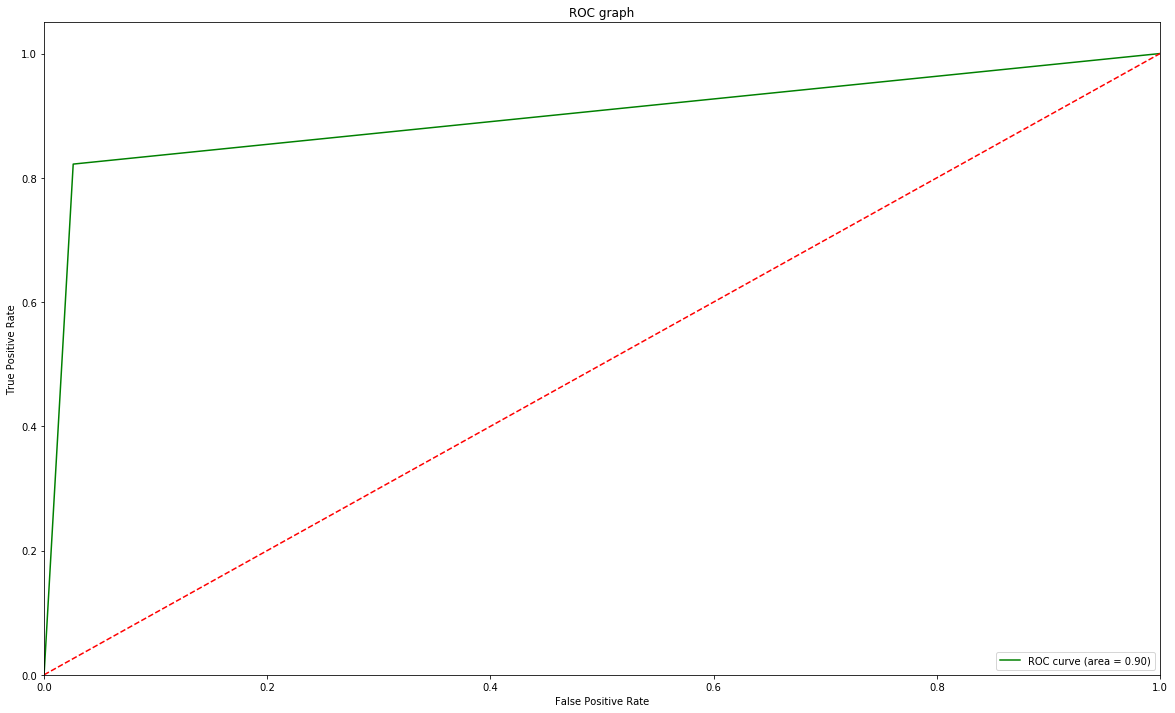

In [151]:
roc_check(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

In [153]:
# If ROC curve is more towards the upper-left corner of the graph - model is very good
# If ROC curve is more towards the 45-degree diagonal then means that the model - completely random

Our above graph ROC curve depicts 90% of area is under the curve.

In [154]:
# Optimal Cutoff Point

In [156]:
num = [float(y)/10 for y in range(10)]
for n in num:
    Y_train_pred_final[n]= Y_train_pred_final.Converted_Prob.map(lambda y: 1 if y > n else 0)
Y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001794         7896          0    1    0    0    0    0   
1          1        0.922275         8701          1    1    1    1    1    1   
2          1        0.969095         6665          1    1    1    1    1    1   
3          1        0.969095         8087          1    1    1    1    1    1   
4          0        0.001794         2466          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    1    1    1    1    1  
3    1    1    1    1    1  
4    0    0    0    0    0

In [157]:
# Lets calculate specificity, accuracy & sensitivity for above probability cutoffs

In [165]:
prob_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for n in numbers:
    cnfsnmatx1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[n] )
    total1=sum(sum(cnfsnmatx1))
    accuracy = (cnfsnmatx1[0,0]+cnfsnmatx1[1,1])/total1
    
    specificity = cnfsnmatx1[0,0]/(cnfsnmatx1[0,0]+cnfsnmatx1[0,1])
    sensitivity = cnfsnmatx1[1,1]/(cnfsnmatx1[1,0]+cnfsnmatx1[1,1])
    prob_df.loc[n] =[ n ,accuracy,sensitivity,specificity]
print(prob_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.377013     1.000000     0.000000
0.1          0.1  0.789210     0.968893     0.680472
0.2          0.2  0.911962     0.934467     0.898343
0.3          0.3  0.911337     0.932808     0.898343
0.4          0.4  0.921658     0.875156     0.949799
0.5          0.5  0.916654     0.822066     0.973896
0.6          0.6  0.916028     0.820406     0.973896
0.7          0.7  0.915715     0.819577     0.973896
0.8          0.8  0.915715     0.819577     0.973896
0.9          0.9  0.875371     0.681460     0.992721



When probability thresholds is low , sensitivity is very high and specificity is very low and vice versa

We can choose 0.3 as the optimal cut-off point because at that point accuracy, sensitivity and specificity metrics seem to be almost equal with values

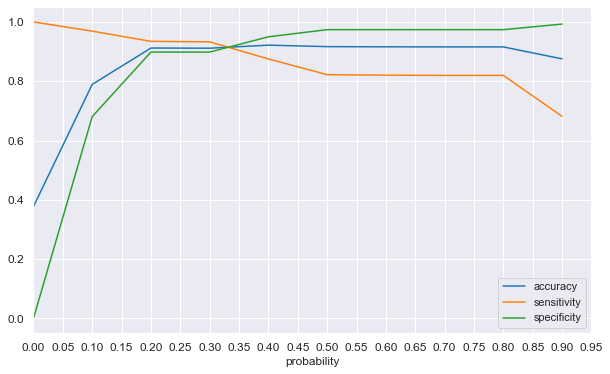

In [168]:
# Graph for above 3 metrices across various probabilities
sns.set_style("darkgrid")
sns.set_context("notebook")
prob_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'],figsize=(10,6))

plt.xticks(np.arange(0,1,step=0.05),size=12)
plt.yticks(size=12)
plt.show()

# Graph depicts probability cut-off at 0.34

In [171]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)
Y_train_pred_final.head()


Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001794         7896          0    1    0    0    0    0   
1          1        0.922275         8701          1    1    1    1    1    1   
2          1        0.969095         6665          1    1    1    1    1    1   
3          1        0.969095         8087          1    1    1    1    1    1   
4          0        0.001794         2466          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    1                1  
2    1    1    1    1    1                1  
3    1    1    1    1    1                1  
4    0    0    0    0    0                0

In [172]:
# overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.9113369820172009

There is an accuracy of 91%

In [173]:
cnfs2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
print(cnfs2)

[[3579  405]
 [ 162 2249]]


In [174]:
True_Pos = cnfs2[1,1] 
True_Neg = cnfs2[0,0] 
False_Pos = cnfs2[0,1] 
False_Neg = cnfs2[1,0] 

In [176]:
# sensitivity check 
sens = True_Pos / float(True_Pos+False_Neg)
sens*100

93.28079635006222

In [177]:
# specificity check 
spec = True_Neg / float(True_Neg+False_Pos)
spec*100

89.83433734939759

In [178]:
# false postive check 
print(False_Pos*100/ float(True_Neg+False_Pos))

10.16566265060241


In [179]:
# positive predictive check 
print (True_Pos *100 / float(True_Pos+False_Pos))

84.74001507159005


In [180]:
# Negative predictive check 
print (True_Neg * 100/ float(True_Neg+ False_Neg))

95.66960705693664


In [181]:
# Precision: Probability that predicted yes is actually a yes
Prec = True_Pos *100 /(True_Pos + False_Pos)
Prec

84.74001507159005

In [182]:
# Recall: Probability that actual yes case is predicted rightly
Rec = True_Pos *100 / (True_Pos + False_Neg)
Rec

93.28079635006222

Precision score

In [185]:
precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)*100

95.0143815915628

Recall score

In [186]:
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)*100

82.20655329738698

# For Train data
Accuracy is: 91% Sensitivity is: 93.28% Specificity is: 89.83% Precision Score is: 95% Recall Score is: 82.20%

In [187]:
# Tradeoff Precision and recall 

In [189]:
Y_train_pred_final.Converted, Y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    0
 6392    1
 6393    1
 6394    1
 Name: Converted, Length: 6395, dtype: int64, 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    0
 6392    0
 6393    1
 6394    1
 Name: predicted, Length: 6395, dtype: int64)

In [190]:
p, r, trshlds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

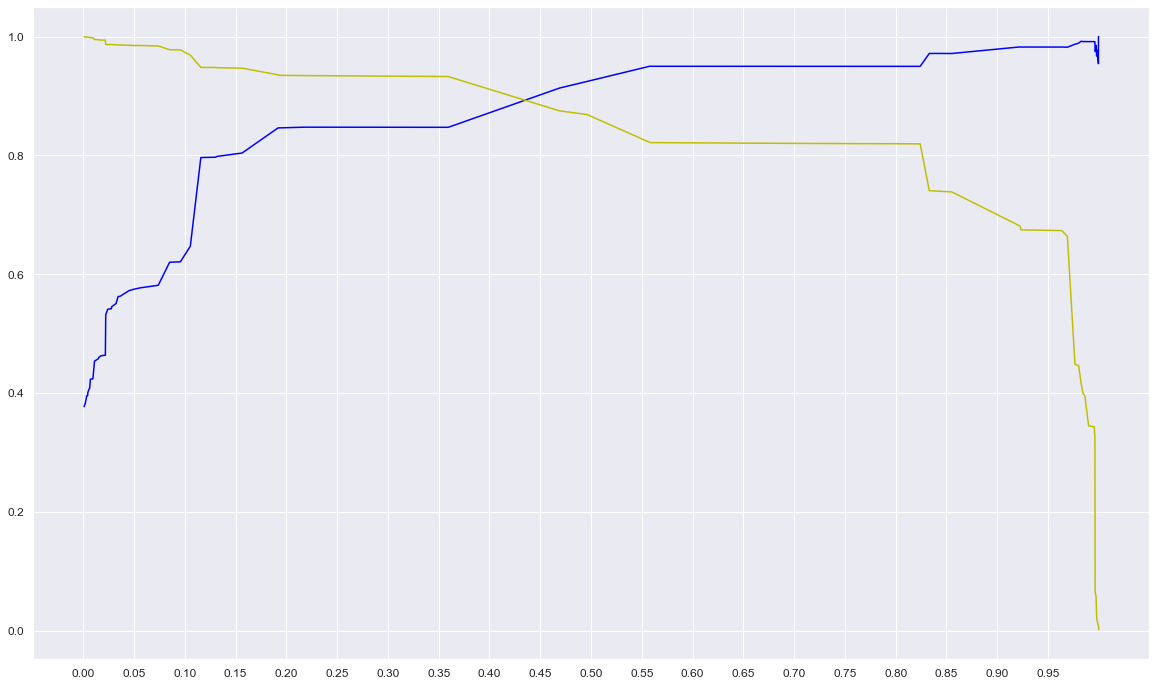

In [191]:
plt.figure(figsize=(20,12))
sns.set_style("darkgrid")
sns.set_context("notebook")

plt.plot(trshlds, p[:-1], "b-")
plt.plot(trshlds, r[:-1], "y-")

plt.xticks(np.arange(0,1,step=0.05),size=12)
plt.yticks(size=12)
plt.show()

In [192]:
# We can see tradeoff at value around 0.44 , which can be used as threshold of test

In [193]:
# Lets make predicition on test data

In [194]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [195]:
X_test = X_test[col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
5499                          0                             0   
1867                          1                             0   
8284                          0                             0   
3522                          0                             0   
7786                          0                             0   

      Last Activity_SMS Sent  current occupation_Not known  \
5499                       0                             0   
1867                       0                             0   
8284                       0                             0   
3522                       1                             0   
7786                       0                             1   

      Tags_Closed by Horizzon  Tags_Diploma holder (Not Eligible)  \
5499                        0                                   0   
1867                        0                                   0   
8284                        0                                   0   
3522                        0                                   0   
7786                        0                                   0   

      Tags_Graduation in progress  Tags_Interested  in full time MBA  \
5499                            0                                  0   
1867                            0                                  0   
8284                            0                                  0   
3522                            0                                  0   
7786                            0                                  0   

      Tags_Interested in other courses  Tags_Lost to EINS  \
5499                                 0                  0   
1867                                 0                  0   
8284                                 0                  0   
3522                                 0                  0   
7786                                 0                  0   

      Tags_Not doing further education  Tags_Ringing  \
5499                                 0             0   
1867                                 0             0   
8284                                 0             0   
3522                                 0             0   
7786                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
5499                                         1                    0   
1867                                         0                    0   
8284                                         1                    0   
3522                                         1                    0   
7786                                         0                    0   

      Tags_number not provided  Tags_opp hangup  Tags_switched off  \
5499                         0                0                  0   
1867                         0                0                  0   
8284                         0                0                  0   
3522                         0                0                  0   
7786                         0                0                  0   

      Tags_wrong number given  Last Notable Activity_Modified  \
5499                        0                               0   
1867                        0                               0   
8284                        0                               0   
3522                        0                               0   
7786                        0                               0   

      Lead Profile_Student of SomeSchool  
5499                                   0  
1867                                   0  
8284                                   0  
3522                                   0  
7786                                   0

In [196]:
# constant addition
test_cols=X_train_4.columns[1:]
X_test_final=X_test[test_cols]               
X_test_final=stm.add_constant(X_test_final)  
Y_pred_test=reg_mod4.predict(X_test_final)  

In [197]:
Y_pred_test[:10]

5499    0.969095
1867    0.359379
8284    0.969095
3522    0.996197
7786    0.105372
8073    0.996197
923     0.359379
2220    0.022065
1857    0.969095
4021    0.922275
dtype: float64

In [246]:
Y_pred_test_df = pd.DataFrame(Y_pred_test)
Y_pred_test_df.head()

0
5499  0.969095
1867  0.359379
8284  0.969095
3522  0.996197
7786  0.105372

In [247]:
Y_test_df = pd.DataFrame(Y_test)

In [248]:
Y_test_df.head()

Converted
5499          1
1867          1
8284          1
3522          1
7786          0

In [249]:
Y_test_df['Lead Num'] = Y_test_df.index

In [250]:
Y_pred_test_df.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [251]:
# Appending above 2 dataframes
Y_df_final = pd.concat([Y_test_df, Y_pred_test_df],axis=1)
Y_df_final.head()

Converted  Lead Num         0
0          1      5499  0.969095
1          1      1867  0.359379
2          1      8284  0.969095
3          1      3522  0.996197
4          0      7786  0.105372

In [252]:
Y_df_final= Y_df_final.rename(columns={ 0 : 'Converted_Probability'})
Y_df_final.head()

Converted  Lead Num  Converted_Probability
0          1      5499               0.969095
1          1      1867               0.359379
2          1      8284               0.969095
3          1      3522               0.996197
4          0      7786               0.105372

In [253]:
# Considering cut-off 0.34 dervied from above tradeoff analysis
Y_df_final['Final_Prediction'] = Y_df_final.Converted_Probability.map(lambda x: 1 if x > 0.34 else 0)

In [254]:
Y_df_final.head()

Converted  Lead Num  Converted_Probability  Final_Prediction
0          1      5499               0.969095                 1
1          1      1867               0.359379                 1
2          1      8284               0.969095                 1
3          1      3522               0.996197                 1
4          0      7786               0.105372                 0

In [256]:
#overall accuracy
metrics.accuracy_score(Y_df_final.Converted,Y_df_final.Final_Prediction)*100

91.0251732944181

# We got accuracy of 91% on test data

In [257]:
# for other metrics

In [259]:
cnfs3 = metrics.confusion_matrix(Y_df_final.Converted,Y_df_final.Final_Prediction )
print(cnfs3)

[[1466  169]
 [  77 1029]]


In [261]:
True_Pos = cnfs3[1,1] 
True_Neg = cnfs3[0,0] 
False_Pos = cnfs3[0,1] 
False_Neg = cnfs3[1,0] 

In [262]:
# sensitivity check
sens = True_Pos / float(True_Pos+False_Neg)
sens*100

93.0379746835443

In [263]:
# specificity check
spec = True_Neg / float(True_Neg+False_Pos)
spec*100

89.66360856269114

In [264]:
# Precision: Probability that predicted yes is actually a yes
Prec = True_Pos *100 /(True_Pos + False_Pos)
Prec

85.89315525876461

In [265]:
# Recall: Probability that actual yes case is predicted rightly
Rec = True_Pos *100 / (True_Pos + False_Neg)
Rec

93.0379746835443

# For test data

Accuracy is: 91%
Sensitivity is: 93.03%
Specificity is: 89.66%
Precision Score is: 85.89%
Recall Score is: 93.03%

In [266]:
# ROC for test curve

In [267]:
def roc_check_test( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(20, 12))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score,color='green')
    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC graph')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [268]:
fpr, tpr, thresholds = metrics.roc_curve( Y_df_final.Converted, Y_df_final.Converted_Probability, drop_intermediate = False )

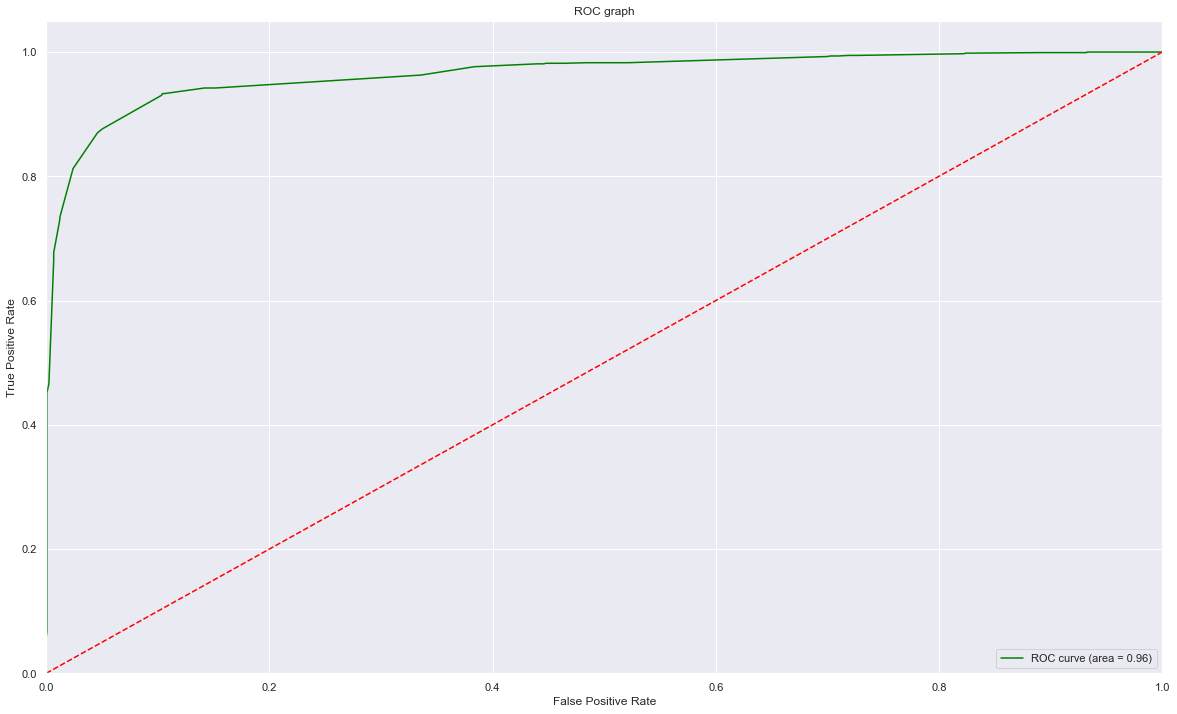

In [269]:
roc_check_test(Y_df_final.Converted, Y_df_final.Converted_Probability)

Our above graph ROC curve depicts 96% of area is under the curve.

In [271]:
# Lets calculate final lead score

Y_df_final['final_lead_score'] = (Y_df_final['Converted_Probability']*100).astype("int64")

In [272]:
Y_df_final.head()

Converted  Lead Num  Converted_Probability  Final_Prediction  \
0          1      5499               0.969095                 1   
1          1      1867               0.359379                 1   
2          1      8284               0.969095                 1   
3          1      3522               0.996197                 1   
4          0      7786               0.105372                 0   

   final_lead_score  
0                96  
1                35  
2                96  
3                99  
4                10

In [273]:
# percentage of Final_Prediction conversions

In [275]:
conv_prec_df = Y_df_final.loc[Y_df_final['Converted']==1,['Converted','Final_Prediction']]
conv_prec_df['Final_Prediction'].value_counts()

1    1029
0      77
Name: Final_Prediction, dtype: int64

In [276]:
(1029/1106)*100

93.0379746835443

# We got lead conversion rate around 93%